In [1]:
%matplotlib inline

# K-Nearest Neighbor


The KNN technique is a tool that also can be used to solve classification problem just like the Naive Bayes Classifier. However, both falls into different kind of category because of a slight difference on the method used. For the Naive Bayes Classifier, it is a part of discriminant analysis because we already know how many category & feature that we will handle beforehand. But for the KNN, the number of category is missing and we simply fit the model with a bunch of data before using probability to identify the most probable category for our data. 

The backbone for the KNN method is the basic probability. Let's say that we're doing the KNN with k=3 and just used 2 features for our model. This means that for a new data that we observed (eg. $x_i$ with coordinate (2,3)), we'll try to find 3 nearest data points that we already observed and know their category (this will be our pooled data). Then, we will assigned our $x_i$ with the category that has the highest probability within our pooled data. 

We'll going through a simulation on how the KNN works. I will use the data from DOSM which is the "Flows of FDI in Malaysia by blocks of country" and predict the type of country block given that we observed a specific amount of credit & debit of the country's FDI into Malaysia.

In [2]:
import pandas as pd

path = r"https://www.data.gov.my/data/dataset/754d77ae-1dfb-4d56-a0aa-d37cffec4ff1/resource/fd1308bc-954f-4b89-a3f5-ede0ee4ec343/download/m-20210309040336_202211160300310_2008-2022-flows-of-foreign-direct-investment-in-malaysia_blocks.csv"
data = pd.read_csv(path)
data = data.rename(columns = {'Blocks of countries':'blocks','Credit RM Million':'credit','Debit RM Million':'debit','Net RM Million':'net'})
data.head()

,Year,blocks,Category,Countries,credit,debit,net
0,2008,East Asia,Total East Asia,Total Country,17175,14129,3046
1,2008,East Asia,of which,"China, People's Republic of",1116,914,201
2,2008,East Asia,of which,"Hong Kong, SAR",5602,4825,777
3,2008,East Asia,of which,Japan,7911,6129,1783
4,2008,East Asia,of which,"Korea, Republic of",886,880,6


In [3]:
# keeping relevant data only. We don't want the Total for each block.
data = data[data['Category']=='of which']
data['blocks'].unique()

array(['East Asia', 'Europe', 'Latin America', 'North America', 'Oceania',
       'Southeast Asia'], dtype=object)

In [4]:
# splitting into train & test dataset
import numpy as np
from sklearn.model_selection import train_test_split

X = []
for i in range(len(data)):
    X.append([data.credit.iloc[i], data.debit.iloc[i]])
X = np.array(X)
y = data['blocks']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
encoder = {'East Asia':1, 'Europe':2, 'Latin America':3, 'North America':4, 'Oceania':5, 'Southeast Asia':6}
y_train = np.array(y_train.map(encoder))

In [5]:
from collections import Counter
import numpy as np

class KNN:    
    def __init__(self, k=3):
        self.k=k
    
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
        
    def predictLabel(self, x):
        # run predict function and return all predictions       
        y_predict = [self.predict(i) for i in x]
        return np.array(y_predict)
    
    def predict(self, x):
        # function to predict label of a point
        # compute the euclidean distance
        distance = [self.euclidean_distance(x,i) for i in self.x_train]
        # return the indices for nearest neighbor using np.argsort
        k_nearest = np.argsort(distance)[:self.k]
        k_labels = [self.y_train[i] for i in k_nearest]
        predLabel = Counter(k_labels).most_common(1)
        return predLabel[0][0]
    
    def euclidean_distance(self,x1,x2):
        return np.sqrt(np.sum((x1-x2)**2))

In [6]:
clf = KNN(k=17)
clf.fit(X_train, y_train)
predictions = pd.Series(clf.predictLabel(X_test))

encoder = {1:'East Asia', 2:'Europe', 3:'Latin America', 4:'North America', 5:'Oceania', 6:'Southeast Asia'}
predictions = np.array(predictions.map(encoder))

accuracy = np.sum(y_test == predictions) / len(y_test)
accuracy

0.43859649122807015

In [7]:
predictions

array(['Europe', 'East Asia', 'Europe', 'Europe', 'Latin America',
       'Europe', 'Southeast Asia', 'East Asia', 'East Asia',
       'North America', 'East Asia', 'Europe', 'Europe', 'East Asia',
       'East Asia', 'Europe', 'Europe', 'Europe', 'Europe', 'East Asia',
       'Latin America', 'Southeast Asia', 'East Asia', 'Europe', 'Europe',
       'Europe', 'Latin America', 'East Asia', 'Europe', 'East Asia',
       'East Asia', 'Latin America', 'Europe', 'Europe', 'Europe',
       'Europe', 'East Asia', 'Europe', 'Europe', 'Southeast Asia',
       'Europe', 'Europe', 'North America', 'East Asia', 'Europe',
       'East Asia', 'Europe', 'Europe', 'Europe', 'Latin America',
       'Europe', 'East Asia', 'East Asia', 'East Asia', 'Europe',
       'Europe', 'East Asia'], dtype=object)

Text(0.5, 1.0, 'Predicted')

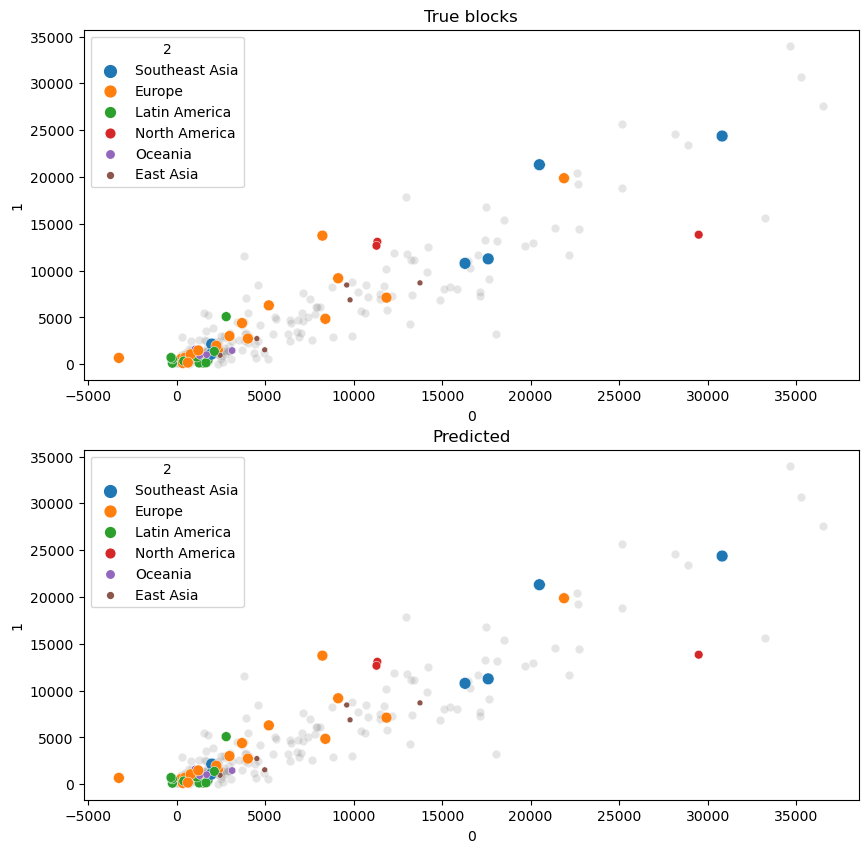

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

test = pd.DataFrame(np.column_stack((X_test,y_test)))
pred = pd.DataFrame(np.column_stack((X_test,predictions)))

fig, ax = plt.subplots(2,1, figsize=(10,10))
sns.scatterplot(data=y_train, x=X_train[:,0], y=X_train[:,1], color='grey', alpha=0.2, ax=ax[0])
sns.scatterplot(data=test[2], x=test[0], y=test[1], hue=test[2], size=test[2], ax=ax[0])

sns.scatterplot(data=y_train, x=X_train[:,0], y=X_train[:,1], color='grey', alpha=0.2, ax=ax[1])
sns.scatterplot(data=pred[2], x=pred[0], y=pred[1], hue=test[2], size=test[2], ax=ax[1])


ax[0].set_title('True blocks')
ax[1].set_title('Predicted')